# Exponential Smoothing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the input files
cabot = pd.read_excel("./Data/CABOT.xls", sheet_name = "Data")[["Year", "Revenue"]]
cabot.head()

,Year,Revenue
0,1981,1622.8
1,1982,1587.7
2,1983,1558.0
3,1984,1752.5
4,1985,1407.5


Text(0.5, 1.0, 'Cabot Corporation Revenue')

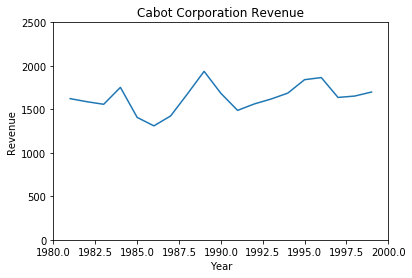

In [2]:
# Plot the Cabot Corp. Revenue
sns.lineplot(x = "Year", y = "Revenue", data = cabot)
plt.ylim(0,2500)
plt.xlim(1980,2000)
plt.title("Cabot Corporation Revenue")

In [41]:
# Smooth the series using Exponential Smoothing model
from statsmodels.tsa.api import SimpleExpSmoothing
index= pd.date_range(start='1981', end='2000', freq='A')
cabot_revenue = pd.Series(np.array(cabot.Revenue), index)

# Weight/Smoothing Coefficient = 0.2
fit1 = SimpleExpSmoothing(cabot_revenue).fit(smoothing_level = 0.2,optimized = False)
fcast1 = fit1.forecast(1).rename(r'$\alpha=0.2$')

# Weight/Smoothing Coefficient = 0.6
fit2 = SimpleExpSmoothing(cabot_revenue).fit(smoothing_level = 0.6,optimized = False)
fcast2 = fit2.forecast(1).rename(r'$\alpha=0.6$')

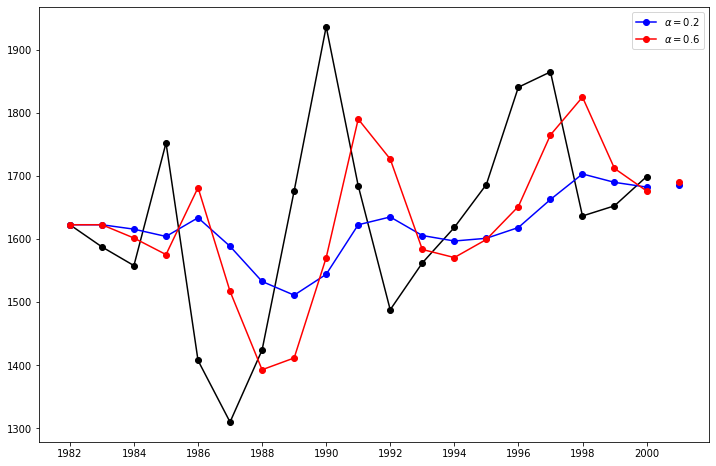

In [42]:
# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))

# Actual Time Series
plt.plot(cabot_revenue, marker='o', color='black')

# Fitted and Forecast values using weight = 0.2
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')

# Fitted and Forecast values using weight = 0.6
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')

plt.legend([line1, line2, line3], [fcast1.name, fcast2.name])